# Decision Tree Project Tutorial

Un árbol de decisión (decision tree) es un modelo que permite resolver problemas tanto de regresión como de clasificación. Es un modelo gráfico que imita la toma de decisiones humanas, es decir, se basa en una serie de preguntas para llegar a una conclusión.

La idea principal detrás de los árboles de decisión es dividir los datos en grupos cada vez más pequeños (llamados nodos) basándose en diferentes criterios hasta llegar a un resultado o decisión final. Estos criterios se seleccionan de tal manera que los elementos de cada nodo sean lo más similares posibles entre sí.

### Predicting Diabetes

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

In this dataset you will find the following variables:

- Pregnancies. Number of pregnancies of the patient (numeric)
- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
- SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
- BMI. Body mass index (numeric)
- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
- Age. Age of patient (numeric)
- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)


# The goal is to predict whether or not a patient has diabetes based on diagnostic measures.

## Step 1: Loading the dataset

In [ ]:
# Cargamos la librería pandas
import pandas as pd

In [ ]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


El dataset cuenta con 9 columnas y 768 filas. 7 puntos de datos son numéricos y 2 son contínuos. No hay valores nulos.

In [ ]:
# Hacemos el escalado de valores, donde normalizamos los datos para que puedan ser comparables entre sí
from sklearn.preprocessing import StandardScaler

num_variables = [col for col in dataframe.columns if col != 'Outcome']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataframe[num_variables])
total_data_scal = pd.DataFrame(scaled_features, index = dataframe.index, columns = num_variables)
total_data_scal['Outcome'] = dataframe['Outcome']

In [ ]:
# Dividimos entre train y test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

x = total_data_scal[num_variables]
y = dataframe['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
train_ids = X_train.index.values
test_ids = X_test.index.values

In [ ]:
# Seleccionamos las variables
selector = SelectKBest(k = 7)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
X_test_selected = X_test[selected_features]
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

In [ ]:
# Volvemos a juntar train y test
data_train_combined = pd.concat([X_train_filtered, y_train], axis = 1)
data_test_combined = pd.concat([X_test_filtered, y_test], axis = 1)
data_train_combined.index = train_ids
data_test_combined.index = test_ids
data_combined = pd.concat([data_train_combined, data_test_combined])

## Step 2: Perform a full EDA

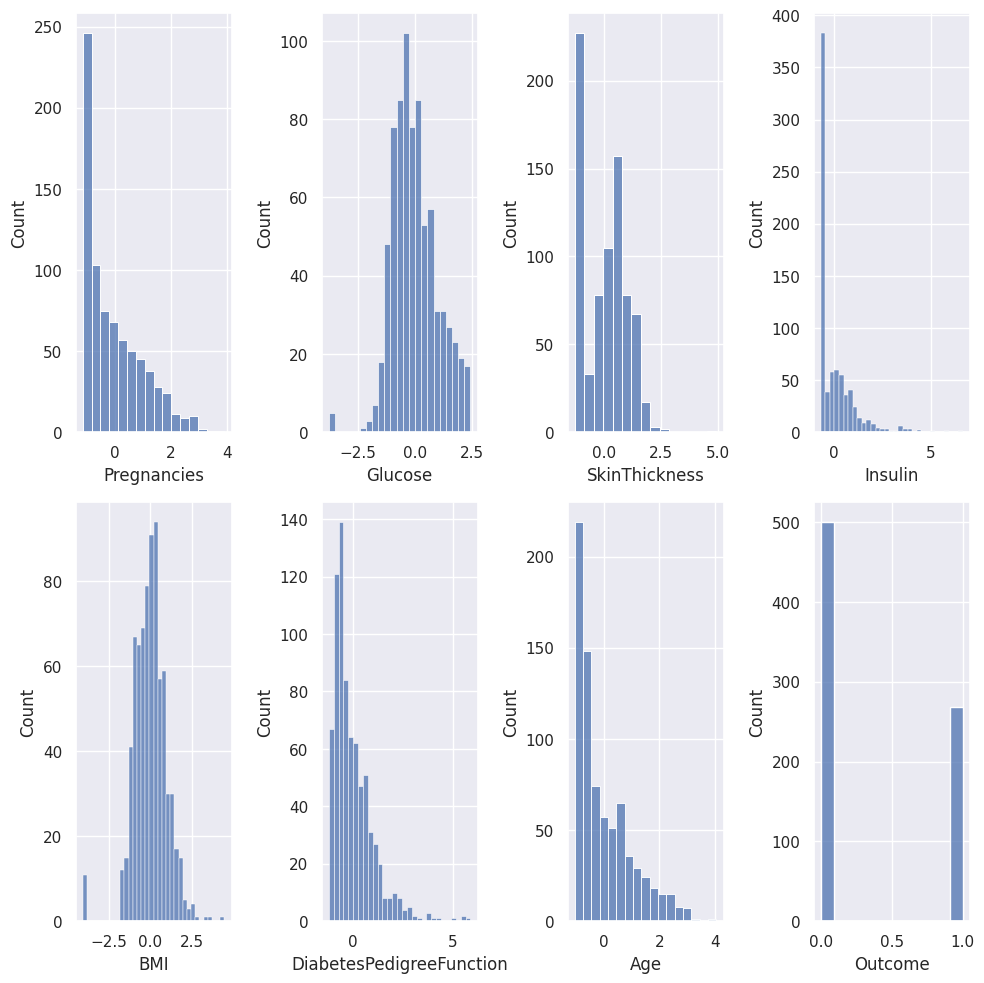

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline


# Assuming you have your data in a DataFrame called 'data_combined'
column_names = data_combined.columns
num_subplots = len(column_names)

# Determine the grid arrangement for subplots
num_rows = 2
num_cols = (num_subplots + num_rows - 1) // num_rows  # Ceiling division to make sure all subplots are accommodated

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

# Flatten the axes if needed
axes = axes.flatten()

# Plot the data on each subplot
for i, col_name in enumerate(column_names):
    sns.histplot(data=data_combined, x=col_name, ax=axes[i])  # Modify this line based on your desired plot type

# Remove any extra empty subplots if the number of subplots is not a perfect multiple of num_rows x num_cols
if num_subplots < num_rows * num_cols:
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


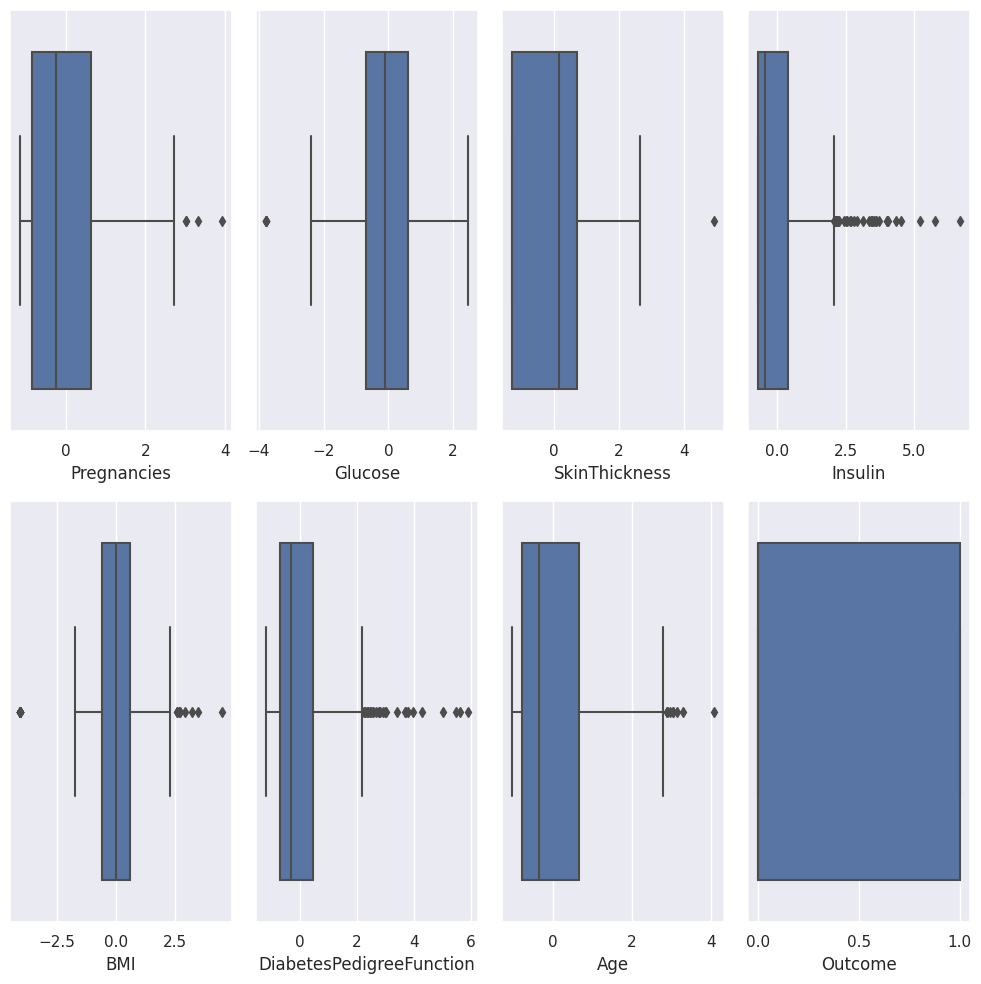

In [ ]:
# Assuming you have your data in a DataFrame called 'data_combined'
column_names = data_combined.columns
num_subplots = len(column_names)

# Determine the grid arrangement for subplots
num_rows = 2
num_cols = (num_subplots + num_rows - 1) // num_rows  # Ceiling division to make sure all subplots are accommodated

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

# Flatten the axes if needed
axes = axes.flatten()

# Plot the data on each subplot
for i, col_name in enumerate(column_names):
    sns.boxplot(data=data_combined, x=col_name, ax=axes[i])  # Modify this line based on your desired plot type

# Remove any extra empty subplots if the number of subplots is not a perfect multiple of num_rows x num_cols
if num_subplots < num_rows * num_cols:
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

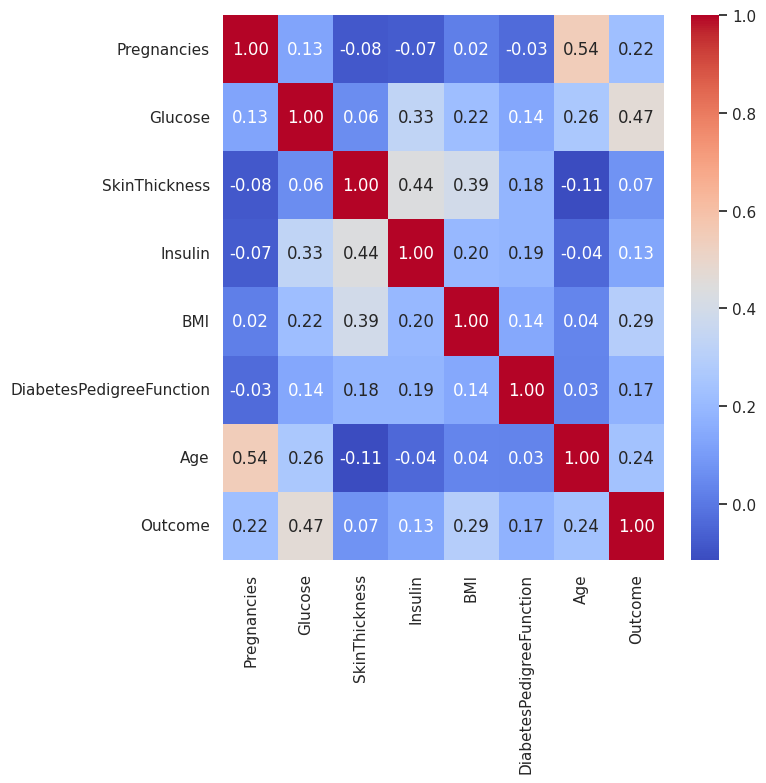

In [ ]:
# Vemos el mapa de correlaciones entre todas las variables
corr_matrix = data_combined.corr()

fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', ax = ax)

plt.tight_layout()

plt.show()

Nos quedamos con 'BMI', 'Age', 'Glucose', 'SkikThickness'

In [ ]:
# Vemos si el dataset tiene valores duplicados
print(dataframe[dataframe.duplicated()])


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [ ]:
# Dividimos el dataframe de nuevo en train y test
num_variables = [col for col in data_combined.columns if col != 'Outcome']
x = data_combined.drop('Outcome', axis = 1)
y = data_combined['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Se aplica el método Kbest, donde se escogerán las características más relevantes del dataset en relación con nuestra variable objetivo
from sklearn.feature_selection import SelectKBest, f_regression
selection_model = SelectKBest(f_regression, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.233880,1.036107,-0.692891,0.051710,-0.087210,1.000557
1,-0.547919,-1.123396,-0.692891,0.965528,1.383588,-0.531023
2,1.827813,0.848324,1.364956,0.711690,1.598016,1.511083
3,1.233880,-1.154694,-0.692891,0.800533,-0.044928,0.490030
4,0.639947,-0.591345,-0.692891,0.470543,0.610438,-0.445935


## Step 3: Build a decision tree model


In [ ]:
# Inicializamos y entrenamos el modelo
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

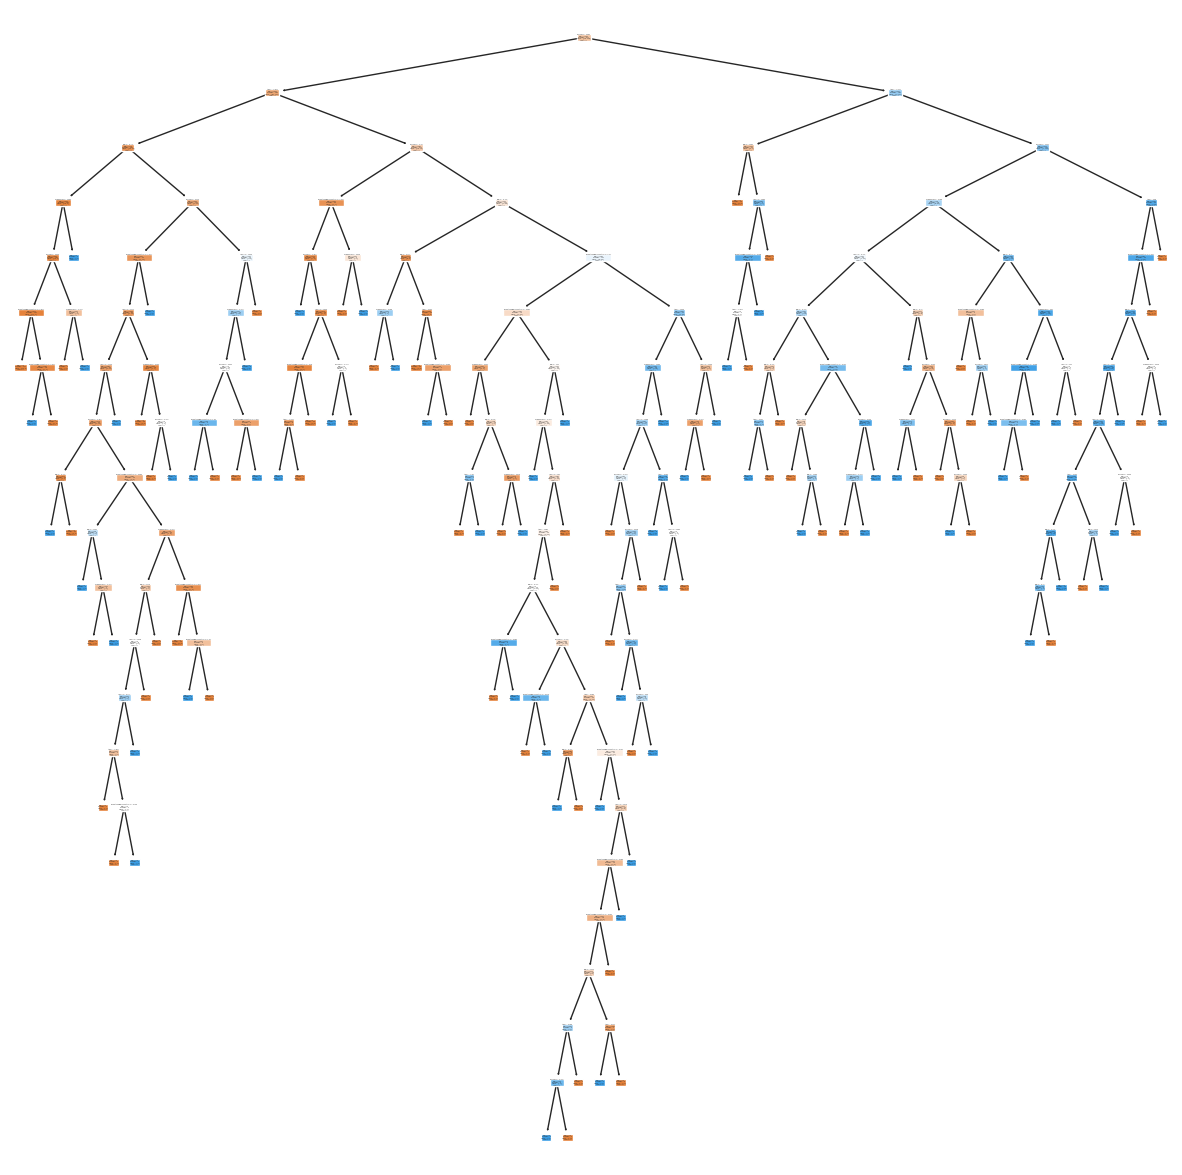

In [ ]:
# Visualizamos el árbol
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [ ]:
# Predecimos el conjunto de datos de prueba
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
# Comprobamos la precisión del modelo
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6558441558441559

## 4. Optimización de hyperparámetros

In [ ]:
# https://www.youtube.com/watch?v=gRTUwkjIVUU

from sklearn.model_selection import RandomizedSearchCV

rs_parameters = {
    'max_depth': (10,30,50,70,90,100),
    'criterion': ('gini', 'entropy'),
    'max_features': ('auto', 'sqrt', 'log2'),
    'min_samples_split': (2,4,6)
    }

rs_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = rs_parameters, cv = 5, verbose = True)

rs_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 30, 50, 70, 90, 100),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [ ]:
rs_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=70, max_features='log2',
                       min_samples_split=4)

In [ ]:
rs_model = DecisionTreeClassifier(ccp_alpha = 0.0, class_weight = None, criterion = 'entropy',
                                  max_depth = 70, max_features = 'log2', max_leaf_nodes = None,
                                  min_impurity_decrease = 0.0,
                                  min_samples_leaf = 1, min_samples_split = 4,
                                  min_weight_fraction_leaf = 0.0,
                                  random_state = 0, splitter = 'best')

rs_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=70, max_features='log2',
                       min_samples_split=4, random_state=0)

In [ ]:
print(f'Train accuracy: {rs_model.score(X_train, y_train):.3f}')
print(f'Test accuracy: {rs_model.score(X_test, y_test):.3f}')

# Está overfitted porque el train supera al test -- hay que cambiar el train y darle más 0.3
# Lo ideal es que salga a la par a más de 70%
# Si está underfitted es cuando el train por debajo del 70%

Train accuracy: 0.963
Test accuracy: 0.675


In [ ]:
# Guardamos el modelo
from pickle import dump

dump(rs_model, open("decision_tree_classifier_default_42.sav", "wb"))